# Data Science Bootcamp 10
# Sprint 06 Homework - Logistic Regression Model

##### This homework is part of Data Science Bootcamp 10, DataRockie (2024)
##### Shinin Varongchayakul

## 1. Objective
1. Create a logistic regression model from the dataset "titanic_train"

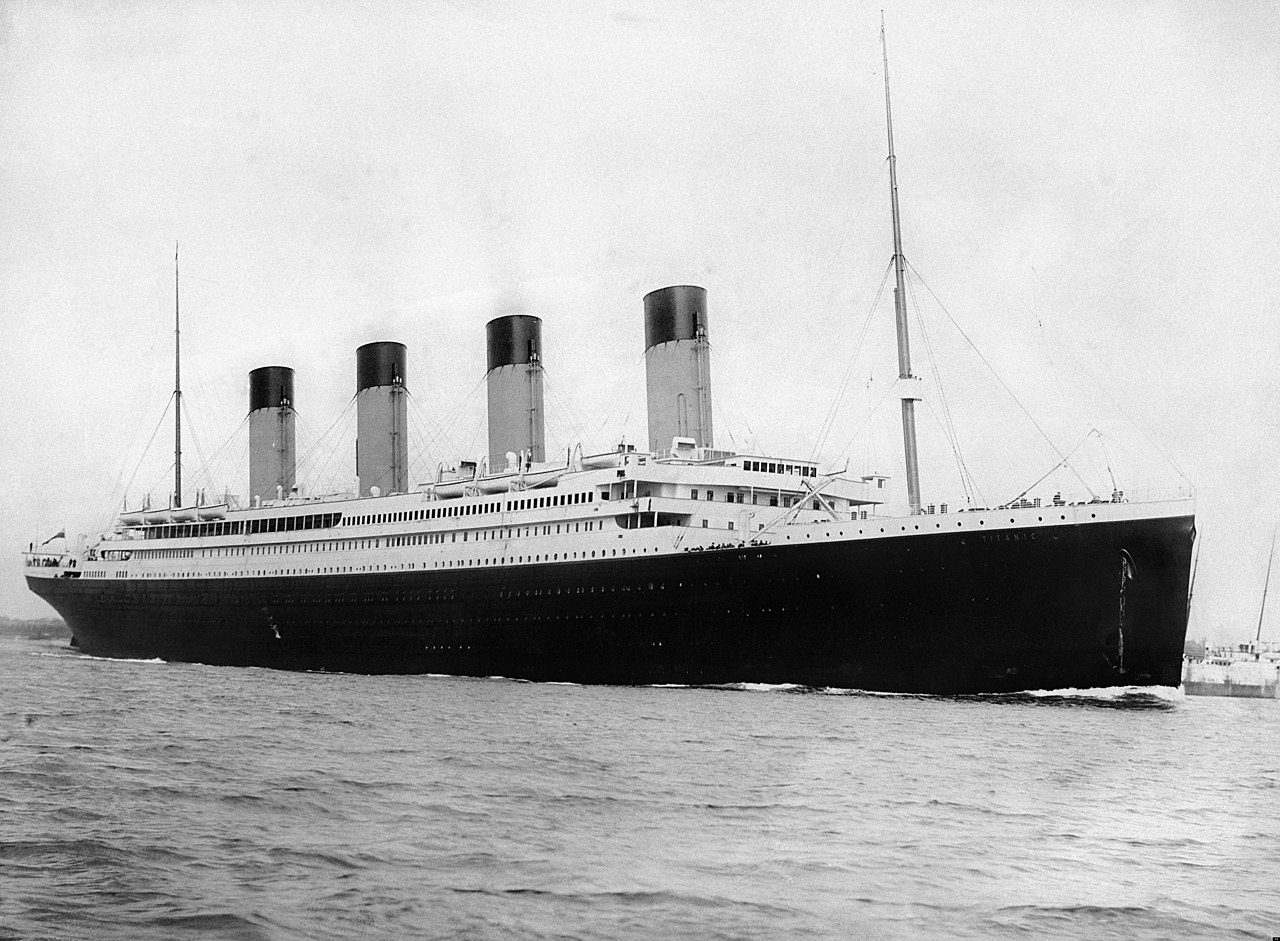
Source: wikipedia

## 2. Variables & Hypothesis
1. Independent variable = the number of parents and/or children aboard
2. Dependent variable = survival indicator

Note: The independen variable was chosen based on the hypothesis that passengers with the greater number of parents/children might be less like to survive as they might want to stay with their family and getting on a life boat in a group might be more difficult than by themselves. Thus, having parents/children on board might hinder their chance of survival.

## 3. Method & Results

1. Install and load package "titanic"

In [37]:
## Step 1 - Install and load package "titanic"
install.packages("titanic")
library(titanic)

head(titanic_train) # view dataset

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


2. Clean data

In [38]:
## Step 2 - Clean data
titanic_train_clean <- na.omit(titanic_train) # drop NA

head(titanic_train_clean)
nrow(titanic_train_clean)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

3. Split data into train and test

In [39]:
## Step 3 - Split data into train and test
set.seed(39)
n <- nrow(titanic_train_clean)
id <- sample(1:n, size =  n*0.7) # get 70% for train, 30% for test

train_data <- titanic_train_clean[id, ] # create a train dataset
test_data <- titanic_train_clean[-id, ] # create a test dataset

4. Create a logistic regression

In [40]:
## Step 4 - Create a logistic regression (x = Parch)
model <- glm(Survived ~ Parch,
             data = train_data,
             family = "binomial")

summary(model)


Call:
glm(formula = Survived ~ Parch, family = "binomial", data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.4892     0.1032  -4.741 2.13e-06 ***
Parch         0.2972     0.1100   2.702  0.00689 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.80  on 498  degrees of freedom
Residual deviance: 668.17  on 497  degrees of freedom
AIC: 672.17

Number of Fisher Scoring iterations: 4


5. Create new columns for predicted y

In [41]:
## Step 5 - Create new columns for predicted y
test_data$prob_surv <- predict(model,
                               newdata = test_data,
                               type = "response")

test_data$pred_surv <- ifelse(test_data$prob_surv > 0.5, 1, 0)

6. Evaluate the model with a confusion matrix

In [42]:
## Step 6 - Evaluate the model with a confusion matrix
confusion <- table(test_data$pred_surv,
                   test_data$Survived,
                   dnn = c("Predicted",
                           "Actual"))

confusion

accuracy <- (confusion[1, 1] + confusion[2, 2]) / sum(confusion)
precision <- confusion[2, 2] / (confusion[2, 1] + confusion[2, 2])
recall <- confusion[2, 2] / (confusion[1, 2] + confusion[2, 2])
f1 <- 2 * (precision * recall) / (precision + recall)

         Actual
Predicted   0   1
        0 117  74
        1  13  11

7. Create a report table

In [43]:
## Step 7 - Create a report table
report <- data.frame(Metric = c("Accuracy",
                                "Precision",
                                "Recall",
                                "F1 Score"),
                     Value = c(round(accuracy, 2),
                               round(precision, 2),
                               round(recall, 2),
                               round(f1, 2)))
  
report

Metric,Value
<chr>,<dbl>
Accuracy,0.60
Precision,0.46
Recall,0.13
F1 Score,0.20


## 4. Discussion
1. Overall, the results suggested that the model still need further improvement.

2. While the model is somewhat accurate (60%) in predicting the survival of Titanic's passengers, its precision and recall poor, indicating that the model has very limited capability in predicting the actual survival rate.

3. Given its extremely low F1 score, the model has difficulty balancing getting the prediction correct without running into false positive.

4. Several things may be done to improve the model such as adding more predictors and adjusting the threshold level when predicting survival.